In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data.head()

,Filename,Image #,Gender,Race,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable,Qualified
0,Google_1_Danielle Goble_5_oval.jpg,1,1,1,5.67,3.67,5.60,5.00,5.80,5.33,4.80,4.67,3.67,4.33,4.67,0
1,Google_1_Phillip Owensby_9_oval.jpg,2,0,1,6.53,2.20,6.60,7.00,7.47,6.73,3.13,6.93,5.80,6.73,6.60,1
2,Google_1_Douglas Ziegler_3_oval.jpg,3,1,1,6.07,3.60,6.47,6.47,6.67,6.40,2.40,6.07,5.14,6.67,6.67,0
3,Google_1_Donald Sauls_11_oval.jpg,4,1,2,4.80,4.60,4.47,3.80,4.27,3.87,5.80,3.53,2.80,2.93,3.27,0
4,Google_1_Eric Harman_5_oval.jpg,5,1,6,6.67,5.40,6.33,4.87,5.87,4.67,4.27,4.07,4.80,5.20,5.33,1


Subset of data based on race only considering Race = 1,2,3

In [ ]:
data_race=data.drop(['Gender','Image #'],axis=1)

In [ ]:
data_race=data_race[data_race["Race"].isin([1,2, 3])]

In [ ]:
from collections import Counter

In [ ]:
Counter(data_race["Race"])

Counter({1: 1836, 2: 220, 3: 63})

In [ ]:
data_gender=data.drop(['Race','Image #'],axis=1)

In [ ]:
race = data_race.groupby(by=["Race"]).mean()

In [ ]:
race

,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable,Qualified
Race,,,,,,,,,,,,
1,5.925109,4.057195,5.863676,5.715496,5.905479,5.645065,3.636961,5.580169,4.869951,5.867516,5.851906,0.183007
2,5.967909,4.322545,5.528636,5.404500,5.514227,5.346682,4.128409,5.305455,4.732318,5.498636,5.647455,0.122727
3,5.836190,3.604444,6.317937,5.857302,6.146032,5.866508,3.217619,5.751429,4.845238,6.043333,5.830635,0.174603


In [ ]:
race = data_race.groupby(by=["Race"]).median()

In [ ]:
race

,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable,Qualified
Race,,,,,,,,,,,,
1,6.03,4.00,6.00,5.930,6.07,5.80,3.40,5.80,4.87,6.19,6.07,0
2,6.13,4.20,5.70,5.835,5.80,5.67,3.73,5.73,4.73,5.93,6.13,0
3,5.87,3.33,6.47,6.190,6.27,6.00,2.93,6.00,4.93,6.33,6.07,0


In [ ]:
results={}

Performing Anova tests for all traits

In [ ]:
from scipy.stats import f_oneway

In [ ]:
cols = data.columns
cols = cols[4:-1]
cols

Index(['Confident', 'Egotistic', 'Intelligent', 'Kind', 'Responsible',
       'Trustworthy', 'Aggressive', 'Caring', 'Emotional', 'Friendly',
       'Sociable'],
      dtype='object')

In [ ]:
race_1  = data_race[data_race['Race']==1]
race_2  = data_race[data_race['Race']==2]
race_3  = data_race[data_race['Race']==3]

In [ ]:
for i in cols:
  results[("Race",i)] = f_oneway(race_1[i],race_2[i],race_3[i])[1]

P values for Anova tests

In [ ]:
results

{('Race', 'Aggressive'): 2.7078370672104353e-11,
 ('Race', 'Caring'): 0.00041893692225684995,
 ('Race', 'Confident'): 0.5125652685487156,
 ('Race', 'Egotistic'): 1.4412211501758323e-07,
 ('Race', 'Emotional'): 0.02319487807768113,
 ('Race', 'Friendly'): 4.9774464052824096e-05,
 ('Race', 'Intelligent'): 1.6711926732092035e-15,
 ('Race', 'Kind'): 0.00012878104123732718,
 ('Race', 'Responsible'): 8.005057161350754e-11,
 ('Race', 'Sociable'): 0.03449616164486741,
 ('Race', 'Trustworthy'): 3.672594877204227e-06}

Subset of data based on gender

In [ ]:
gender = data_gender.groupby(by=["Gender"]).median()

In [ ]:
gender

,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable,Qualified
Gender,,,,,,,,,,,,
0,6.13,3.5,6.00,6.33,6.20,6.13,3.00,6.27,5.33,6.53,6.40,0
1,5.93,4.4,5.87,5.53,5.87,5.47,3.88,5.33,4.53,5.73,5.67,0


In [ ]:
gender = data_gender.groupby(by=["Gender"]).mean()

In [ ]:
gender

,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable,Qualified
Gender,,,,,,,,,,,,
0,5.994449,3.601511,5.947671,6.172770,6.118059,6.008562,3.127545,6.081123,5.289098,6.314092,6.257156,0.118573
1,5.865760,4.432829,5.752246,5.303822,5.667762,5.309094,4.110788,5.139165,4.528345,5.450024,5.488266,0.208826


Performing t-tests for all traits

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
Gender_1 = data[data['Gender']==0]
Gender_2 = data[data['Gender']==1]

#ttest_ind(Gender_1['Confident'], Gender_2['Confident'])

In [ ]:
cols = data.columns
cols = cols[4:-1]

In [ ]:
for i in cols:
  print(i)
  val = ttest_ind(Gender_1[i], Gender_2[i])
  print(val)
  results[("Gender",i)]= val[1]
  print()

Confident
Ttest_indResult(statistic=3.66917416692047, pvalue=0.0002490671279198179)

Egotistic
Ttest_indResult(statistic=-22.7262686753705, pvalue=5.724535735483598e-103)

Intelligent
Ttest_indResult(statistic=6.202285041707829, pvalue=6.617541566954897e-10)

Kind
Ttest_indResult(statistic=20.297689926853188, pvalue=3.6772754632964984e-84)

Responsible
Ttest_indResult(statistic=12.36280978838484, pvalue=5.314276336798082e-34)

Trustworthy
Ttest_indResult(statistic=18.755142226724622, pvalue=5.706506511591532e-73)

Aggressive
Ttest_indResult(statistic=-22.47095116212666, pvalue=6.29311355462135e-101)

Caring
Ttest_indResult(statistic=22.965908793068422, pvalue=6.745136923994714e-105)

Emotional
Ttest_indResult(statistic=29.83017935114266, pvalue=1.029377924430242e-164)

Friendly
Ttest_indResult(statistic=17.472988984512813, pvalue=3.7108186188490396e-64)

Sociable
Ttest_indResult(statistic=17.18204476074865, pvalue=3.1946748840509533e-62)



P values for Anova tests and t tests

In [ ]:
|results

{('Gender', 'Aggressive'): 6.29311355462135e-101,
 ('Gender', 'Caring'): 6.745136923994714e-105,
 ('Gender', 'Confident'): 0.0002490671279198179,
 ('Gender', 'Egotistic'): 5.724535735483598e-103,
 ('Gender', 'Emotional'): 1.029377924430242e-164,
 ('Gender', 'Friendly'): 3.7108186188490396e-64,
 ('Gender', 'Intelligent'): 6.617541566954897e-10,
 ('Gender', 'Kind'): 3.6772754632964984e-84,
 ('Gender', 'Responsible'): 5.314276336798082e-34,
 ('Gender', 'Sociable'): 3.1946748840509533e-62,
 ('Gender', 'Trustworthy'): 5.706506511591532e-73,
 ('Race', 'Aggressive'): 2.7078370672104353e-11,
 ('Race', 'Caring'): 0.00041893692225684995,
 ('Race', 'Confident'): 0.5125652685487156,
 ('Race', 'Egotistic'): 1.4412211501758323e-07,
 ('Race', 'Emotional'): 0.02319487807768113,
 ('Race', 'Friendly'): 4.9774464052824096e-05,
 ('Race', 'Intelligent'): 1.6711926732092035e-15,
 ('Race', 'Kind'): 0.00012878104123732718,
 ('Race', 'Responsible'): 8.005057161350754e-11,
 ('Race', 'Sociable'): 0.0344961616448

Finding the significant results based on significance level = 0.05

In [ ]:
significant_results={}
for i in results:
  if results[i]<0.05:
    significant_results[i]=results[i]
  else:
    continue
  

In [ ]:
significant_results

{('Gender', 'Aggressive'): 6.29311355462135e-101,
 ('Gender', 'Caring'): 6.745136923994714e-105,
 ('Gender', 'Confident'): 0.0002490671279198179,
 ('Gender', 'Egotistic'): 5.724535735483598e-103,
 ('Gender', 'Emotional'): 1.029377924430242e-164,
 ('Gender', 'Friendly'): 3.7108186188490396e-64,
 ('Gender', 'Intelligent'): 6.617541566954897e-10,
 ('Gender', 'Kind'): 3.6772754632964984e-84,
 ('Gender', 'Responsible'): 5.314276336798082e-34,
 ('Gender', 'Sociable'): 3.1946748840509533e-62,
 ('Gender', 'Trustworthy'): 5.706506511591532e-73,
 ('Race', 'Aggressive'): 2.7078370672104353e-11,
 ('Race', 'Caring'): 0.00041893692225684995,
 ('Race', 'Egotistic'): 1.4412211501758323e-07,
 ('Race', 'Emotional'): 0.02319487807768113,
 ('Race', 'Friendly'): 4.9774464052824096e-05,
 ('Race', 'Intelligent'): 1.6711926732092035e-15,
 ('Race', 'Kind'): 0.00012878104123732718,
 ('Race', 'Responsible'): 8.005057161350754e-11,
 ('Race', 'Sociable'): 0.03449616164486741,
 ('Race', 'Trustworthy'): 3.6725948772

Top 5 significant biases

In [ ]:
sorted_results = sorted(significant_results.items(), key=lambda x: x[1])    
final = sorted_results
print(final[:5])

[(('Gender', 'Emotional'), 1.029377924430242e-164), (('Gender', 'Caring'), 6.745136923994714e-105), (('Gender', 'Egotistic'), 5.724535735483598e-103), (('Gender', 'Aggressive'), 6.29311355462135e-101), (('Gender', 'Kind'), 3.6772754632964984e-84)]


In [ ]:
trieal = {('Race', 'Aggressive'): 2.7078370672104353e-11,
 ('Race', 'Caring'): 0.00041893692225684995,
 ('Race', 'Confident'): 0.5125652685487156,
 ('Race', 'Egotistic'): 1.4412211501758323e-07,
 ('Race', 'Emotional'): 0.02319487807768113,
 ('Race', 'Friendly'): 4.9774464052824096e-05,
 ('Race', 'Intelligent'): 1.6711926732092035e-15,
 ('Race', 'Kind'): 0.00012878104123732718,
 ('Race', 'Responsible'): 8.005057161350754e-11,
 ('Race', 'Sociable'): 0.03449616164486741,
 ('Race', 'Trustworthy'): 3.672594877204227e-06}

In [ ]:
sorted(trieal.items(), key=lambda x: x[1])  

[(('Race', 'Intelligent'), 1.6711926732092035e-15),
 (('Race', 'Aggressive'), 2.7078370672104353e-11),
 (('Race', 'Responsible'), 8.005057161350754e-11),
 (('Race', 'Egotistic'), 1.4412211501758323e-07),
 (('Race', 'Trustworthy'), 3.672594877204227e-06),
 (('Race', 'Friendly'), 4.9774464052824096e-05),
 (('Race', 'Kind'), 0.00012878104123732718),
 (('Race', 'Caring'), 0.00041893692225684995),
 (('Race', 'Emotional'), 0.02319487807768113),
 (('Race', 'Sociable'), 0.03449616164486741),
 (('Race', 'Confident'), 0.5125652685487156)]

Plotting the significant bias for Gender for trait: Emotional

In [ ]:
import numpy as np

In [31]:
hist_male = {}
hist_female={}
values=[]
values_1=[]
for row,i in data.iterrows():
  #print(i["Gender"])
  if i["Gender"]==0:
    key=i["Emotional"]
    hist_female[key] = hist_female.get(key, 0) + 1
    values.append(key)
  elif i["Gender"]==1:
    key=i["Emotional"]
    hist_male[key] = hist_male.get(key, 0) + 1
    values_1.append(key)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


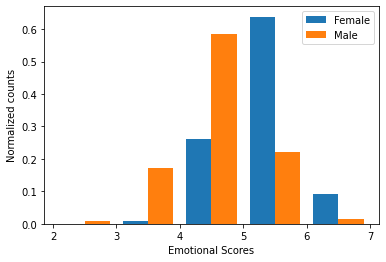

In [32]:
import pandas as pd
import pdb
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist([values,values_1], bins=[2,3,4,5,6,7], density=True, label=['Female','Male'])
ax.set_xlabel("Emotional Scores")
ax.set_ylabel("Normalized counts")
ax.legend(labels=['Female','Male'])
fig.show()

Plotting the significant bias for Race for trait: Intelligent

In [34]:
hist_race_1 = {}
hist_race_2={}
hist_race_3={}
values_1=[]
values_2=[]
values_3=[]
for row,i in data.iterrows():
  #print(i["Gender"])
  if i["Race"]==1:
    key=i["Intelligent"]
    hist_race_1[key] = hist_race_1.get(key, 0) + 1
    values_1.append(key)
  elif i["Race"]==2:
    key=i["Intelligent"]
    hist_race_2[key] = hist_race_2.get(key, 0) + 1
    values_2.append(key)
  elif i["Race"]==3:
    key=i["Intelligent"]
    hist_race_3[key] = hist_race_3.get(key, 0) + 1
    values_3.append(key)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


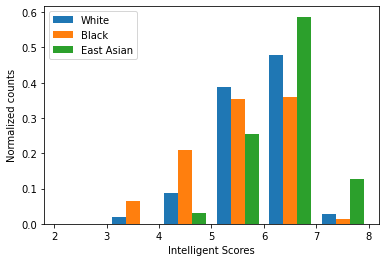

In [35]:
import pandas as pd
import pdb
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist([values_1,values_2,values_3], bins=[2,3,4,5,6,7,8], density=True, label=['white','black','east asian'])
ax.set_xlabel("Intelligent Scores")
ax.set_ylabel("Normalized counts")
ax.legend(labels=['White', 'Black','East Asian'])
fig.show()

Calculation the Selection rate based on race

In [ ]:
comparison_race_sum = data_race.groupby(by=["Race"]).sum()

In [ ]:
comparison_race_sum

,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable,Qualified
Race,,,,,,,,,,,,
1,10878.50,7449.01,10765.71,10493.65,10842.46,10364.34,6677.46,10245.19,8941.23,10772.76,10744.10,336
2,1312.94,950.96,1216.30,1188.99,1213.13,1176.27,908.25,1167.20,1041.11,1209.70,1242.44,27
3,367.68,227.08,398.03,369.01,387.20,369.59,202.71,362.34,305.25,380.73,367.33,11


In [ ]:
comparison_race_count = data_race.groupby(by=["Race"]).count()

In [ ]:
comparison_race_count

,Filename,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable,Qualified
Race,,,,,,,,,,,,,
1,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836,1836
2,220,220,220,220,220,220,220,220,220,220,220,220,220
3,63,63,63,63,63,63,63,63,63,63,63,63,63


In [ ]:
res= (comparison_race_sum/comparison_race_count)['Qualified']

Selection rates for Race: 1 (White), 2 (Black), 3 (East Asian)




In [ ]:
res

Race
1    0.183007
2    0.122727
3    0.174603
Name: Qualified, dtype: float64

Calculation the Selection rate based on gender

In [ ]:
comparison_gender_sum = data.groupby(by=["Gender"]).sum()

In [ ]:
comparison_gender_sum

,Image #,Race,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable,Qualified
Gender,,,,,,,,,,,,,,
0,1076133,1294,5712.71,3432.24,5668.13,5882.65,5830.51,5726.16,2980.55,5795.31,5040.51,6017.33,5963.07,113
1,1393620,1695,7443.65,5625.26,7299.60,6730.55,7192.39,6737.24,5216.59,6521.60,5746.47,6916.08,6964.61,265


In [ ]:
comparison_gender_count = data.groupby(by=["Gender"]).count()

In [ ]:
comparison_gender_count

,Filename,Image #,Race,Confident,Egotistic,Intelligent,Kind,Responsible,Trustworthy,Aggressive,Caring,Emotional,Friendly,Sociable,Qualified
Gender,,,,,,,,,,,,,,,
0,953,953,953,953,953,953,953,953,953,953,953,953,953,953,953
1,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269,1269


In [ ]:
res= (comparison_gender_sum/comparison_gender_count)['Qualified']

Selection rates for gender: 0 (Female), 1 (Male)

In [ ]:
res

Gender
0    0.118573
1    0.208826
Name: Qualified, dtype: float64